In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def showimg(img: str):
    plt.figure(dpi=100,figsize=(6,6))
    plt.imshow(img)

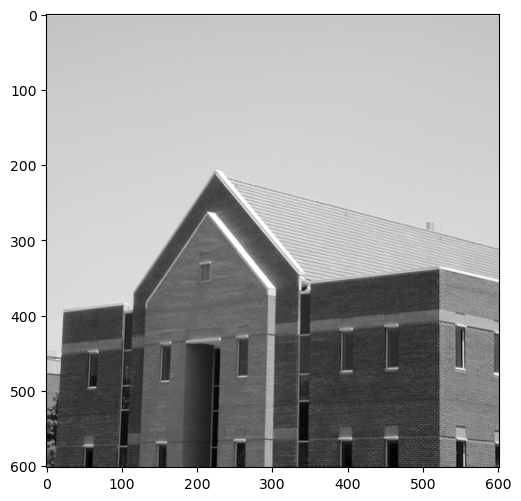

In [75]:
img = cv2.imread('roof.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

showimg(img)

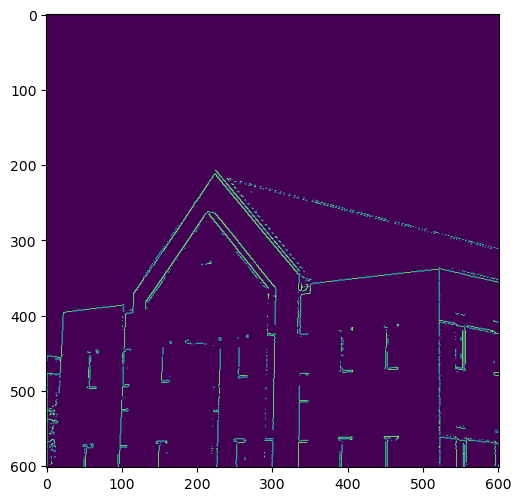

In [82]:
edges = cv2.Canny(gray,300,300,apertureSize=3)
showimg(edges)

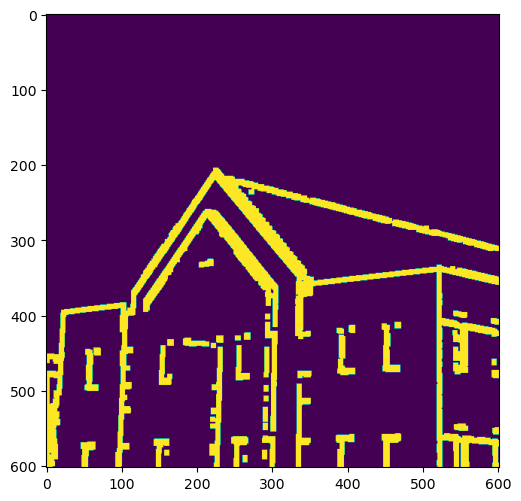

In [83]:
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 3)
showimg(edges)

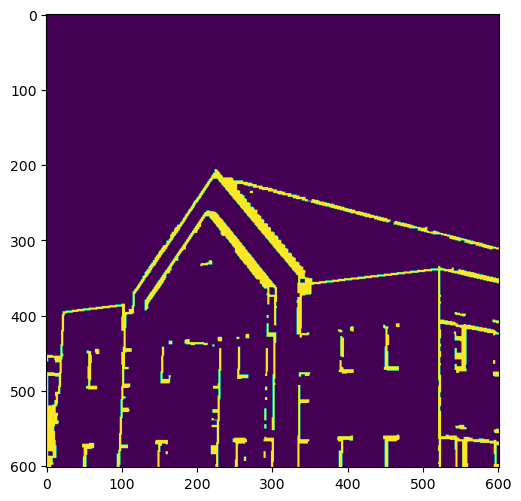

In [84]:
kernel = np.ones((5,5),np.uint8)
edges = cv2.erode(edges,kernel,iterations = 1)
showimg(edges)

In [85]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
print('number of Hough lines:', len(lines))

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

number of Hough lines: 102


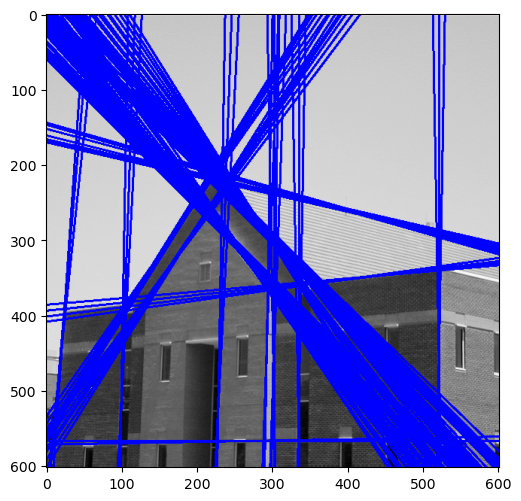

In [86]:
showimg(img)